In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from kmeans import Kmeans
from sklearn.decomposition import PCA

In [64]:
df = pd.read_csv('quake.csv')

df.columns = ['latitude', 'longitude']

latitudes = df['latitude']
longitudes = df['longitude']
tabelas_juntas = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes})


c:\Users\Luciano\Documents\GitHub\Statistical-Modeling\kmedias_pca\kmeans.py:45: RuntimeWarning: divide by zero encountered in divide
  db_values[i] = np.sum((intra_cluster_distances[i] + intra_cluster_distances) / inter_cluster_distances[i, :])


   latitude  longitude  cluster
0     45.53     150.93        0
1     41.85     142.78        0
2     29.19     141.15        0
3    -21.66     169.81        0
4     23.09     120.58        0
Número ótimo de clusters: 4


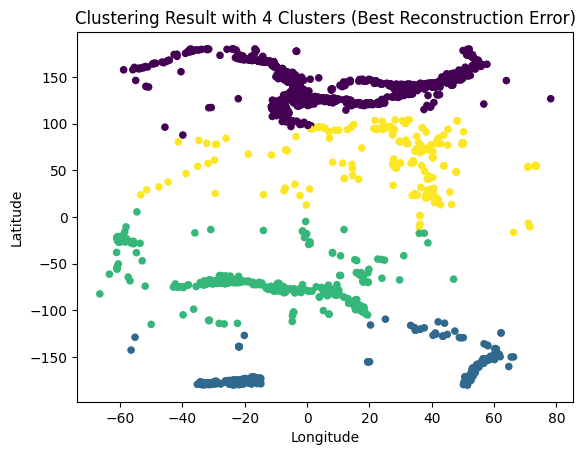

In [65]:
kmeans = Kmeans(tabelas_juntas)

# Número de execuções do K-means
num_execucoes = 20

# Inicializar com um erro de reconstrução grande para garantir que a primeira solução seja escolhida
melhor_erro_global = float('inf')
melhores_rotulos = None
melhores_centróides = None

# Testar diferentes números de grupos
for num_clusters in range(4, 21):
    db_values = []

    for _ in range(num_execucoes):
        # Executar o K-means
        labels, centroids, erro_de_reconstrucao = kmeans.kmeans_euclidean(k=num_clusters)

        # Calcular o índice Davies-Bouldin
        db = kmeans.davies_bouldin_index(labels, centroids)
        db_values.append(db)

        # Verificar se é a melhor solução até agora
        if erro_de_reconstrucao < melhor_erro_global:
            melhor_erro_global = erro_de_reconstrucao
            melhores_rotulos = labels
            melhores_centróides = centroids

    # Escolher o número ótimo de grupos com base no menor valor de Davies-Bouldin
    num_otimizado_clusters = db_values.index(min(db_values)) + 4

# Adicionar os rótulos ao DataFrame original
df['cluster'] = melhores_rotulos

# Exibir o DataFrame com os rótulos de cluster
print(df.head())

# Exibir o número ótimo de clusters
print(f'Número ótimo de clusters: {num_otimizado_clusters}')

# Plotar o resultado de agrupamento com o melhor modelo
plt.scatter(df['latitude'], df['longitude'], c=df['cluster'], cmap='viridis', s=20)
plt.title(f'Clustering Result with {num_otimizado_clusters} Clusters (Best Reconstruction Error)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [102]:
# Carregar o conjunto de dados (substitua 'seu_arquivo.csv' pelo nome do seu arquivo)
dataframe = pd.read_csv('penguins.csv')

# Separar os atributos das classes
X = dataframe.iloc[:, :-1]  # Seleciona todas as colunas, exceto a última
y = dataframe.iloc[:, -1]   # Seleciona apenas a última coluna (classe)

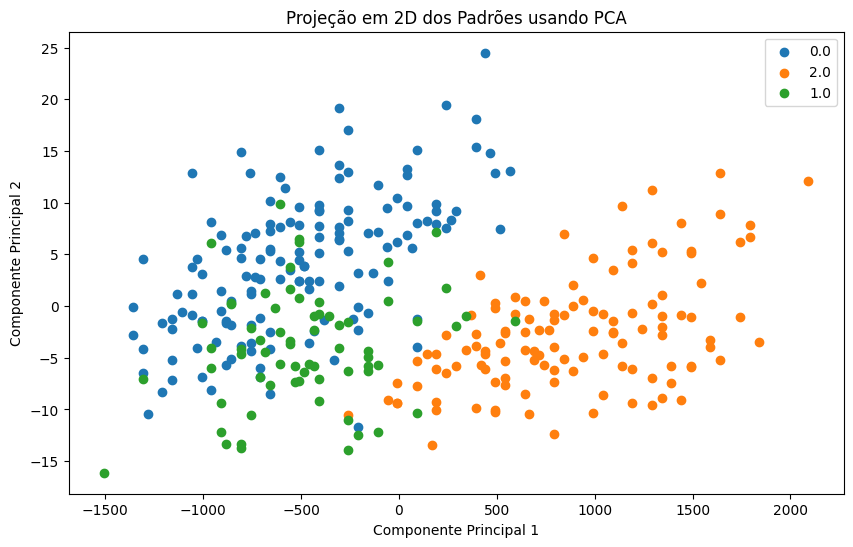

Variância explicada pelo Componente Principal 1: 0.9999
Variância explicada pelo Componente Principal 2: 0.0001


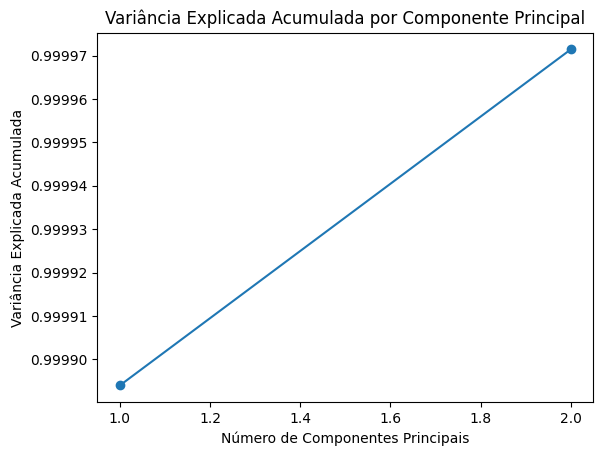

In [99]:
# Inicializar o modelo PCA para 2 componentes principais
pca = PCA(n_components=2)

# Ajustar o modelo aos dados e transformar os dados para as novas dimensões
X_pca = pca.fit_transform(X)

# Criar um DataFrame com os dados projetados e adicionar a coluna de classe
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Classe'] = df.iloc[:, -1].values

# Exibir a projeção em 2D dos padrões
plt.figure(figsize=(10, 6))
classes = df_pca['Classe'].unique()

for classe in classes:
    indices = df_pca['Classe'] == classe
    plt.scatter(df_pca.loc[indices, 'Componente Principal 1'],
                df_pca.loc[indices, 'Componente Principal 2'],
                label=classe)

plt.title('Projeção em 2D dos Padrões usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Calcular a variância explicada para diferentes números de dimensões projetadas (1 a 4)
variancia_explicada_razao = pca.variancia_explicada_razao_

# Exibir os resultados
for i, explained_variance in enumerate(variancia_explicada_razao, 1):
    print(f"Variância explicada pelo Componente Principal {i}: {explained_variance:.4f}")

# Plotar a variância explicada acumulada
variancia_explicada_cumulativa = np.cumsum(variancia_explicada_razao)
plt.plot(range(1, len(variancia_explicada_cumulativa) + 1), variancia_explicada_cumulativa, marker='o')
plt.title('Variância Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.show()